In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as smi

# 100 day simple

In [2]:
num_epochs = 500
ctx_len = 4
start_day = 4950
days_to_generate = 100
num_vaes = 1000

data = np.load("data/vol_surface_with_ret.npz")
vol_surf_data = data["surface"]
ret_data = data["ret"]
level_data = data["levels"]
skew_data = data["skews"]
slope_data = data["slopes"]

In [3]:
# we do a linear regression on 2 variables
# X = realized value on day t, Y = VAE values on day t
result_df = {
    "model_type": [],
    "ctx_len": [],
    "coeff": [],
    "p_value": [],
    "r2": [],
}
real_surface_levels = level_data[start_day:start_day+days_to_generate]
for model_type in ["conv_mem_spx_rand_compress_context_0",
                   "conv_mem_spx_ex_rand_compress_context_0",
                   "conv_mem_spx_ex3_0",
                   "conv_mem_spx_ex4_2"]:
    for ctx_len in [2, 3, 4, 5]:
        generated = np.load(f"test_spx/simpath/{model_type}_gen{ctx_len}.npy") #(num_day, num_sample, H, W)
        generated_levels = generated[:, :, 3, 2] # (num_day, num_sample)
        X = []
        y = []
        for i in range(generated_levels.shape[0]):
            for j in range(generated_levels.shape[1]):
                X.append(real_surface_levels[i])
                y.append(generated_levels[i, j])
        model = smi.OLS(y, X).fit(cov_type="HC3")
        result_df["model_type"].append(model_type)
        result_df["ctx_len"].append(ctx_len)
        result_df["coeff"].append(model.params[0])
        result_df["p_value"].append(model.pvalues[0])
        result_df["r2"].append(model.rsquared_adj)
result_df = pd.DataFrame(result_df)
result_df.to_csv("test_spx/lin_reg_test.csv", index=False)

In [4]:
# we do a linear regression on 2 variables
# X = realized value on day t, Y = VAE values on day t
result_df = {
    "model_type": [],
    "ctx_len": [],
    "coeff": [],
    "p_value": [],
    "r2": [],
}
real_surface_levels = level_data[start_day:start_day+days_to_generate]
for model_type in ["conv_mem_spx_rand_compress_context_0",
                   "conv_mem_spx_ex_rand_compress_context_0",
                   "conv_mem_spx_ex3_0",
                   "conv_mem_spx_ex4_2"]:
    for ctx_len in [2, 3, 4, 5]:
        generated = np.load(f"test_spx/simpath/{model_type}_gen{ctx_len}.npy") #(num_day, num_sample, H, W)
        generated_levels = generated[:, :, 3, 2] # (num_day, num_sample)
        generated_levels_mean = np.mean(generated_levels, axis=1)
        model = smi.OLS(generated_levels_mean, real_surface_levels).fit(cov_type="HC3")
        result_df["model_type"].append(model_type)
        result_df["ctx_len"].append(ctx_len)
        result_df["coeff"].append(model.params[0])
        result_df["p_value"].append(model.pvalues[0])
        result_df["r2"].append(model.rsquared_adj)
result_df = pd.DataFrame(result_df)
result_df.to_csv("test_spx/lin_reg_test1-2.csv", index=False)

In [5]:
# we do a linear regression on 2 variables
# X = realized value on day t, Y = VAE values on day t
result_df = {
    "model_type": [],
    "ctx_len": [],
    "level_coeff": [],
    "level_p_value": [],
    "level_r2": [],
    "ret_coeff": [],
    "ret_p_value": [],
    "ret_r2": [],
}
real_surface_levels = level_data[start_day:start_day+days_to_generate]
real_ret = ret_data[start_day:start_day+days_to_generate]
for model_type in ["conv_mem_spx_ex_rand_compress_context_1",
                   "conv_mem_spx_ex3_1",
                   "ex3_model_0",
                   "ex3_model_1",
                   "conv_mem_spx_ex4_3",
                   "ex4_model_0",
                   "ex4_model_1",]:
    for ctx_len in [2, 3, 4, 5]:
        generated = np.load(f"test_spx/simpath/{model_type}_gen{ctx_len}.npz")
        surfaces = generated["surfaces"] #(num_day, num_sample, H, W)
        ex_feats = generated["ex_feats"] #(num_day, num_sample, n_ex_feats)
        generated_levels = surfaces[:, :, 3, 2]
        generated_rets = ex_feats[:, :, 0]
        X = []
        y = []
        for i in range(generated_levels.shape[0]):
            for j in range(generated_levels.shape[1]):
                X.append(real_surface_levels[i])
                y.append(generated_levels[i, j])
        model = smi.OLS(y, X).fit(cov_type="HC3")
        result_df["model_type"].append(model_type)
        result_df["ctx_len"].append(ctx_len)
        result_df["level_coeff"].append(model.params[0])
        result_df["level_p_value"].append(model.pvalues[0])
        result_df["level_r2"].append(model.rsquared_adj)
        X = []
        y = []
        for i in range(generated_rets.shape[0]):
            for j in range(generated_rets.shape[1]):
                X.append(real_ret[i])
                y.append(generated_rets[i, j])
        model = smi.OLS(y, X).fit(cov_type="HC3")
        result_df["ret_coeff"].append(model.params[0])
        result_df["ret_p_value"].append(model.pvalues[0])
        result_df["ret_r2"].append(model.rsquared_adj)
result_df = pd.DataFrame(result_df)
result_df.to_csv("test_spx/lin_reg_test2.csv", index=False)

In [6]:
# we do a linear regression on 2 variables
# X = realized value on day t, Y = VAE values on day t
result_df = {
    "model_type": [],
    "ctx_len": [],
    "level_coeff": [],
    "level_p_value": [],
    "level_r2": [],
    "ret_coeff": [],
    "ret_p_value": [],
    "ret_r2": [],
}
real_surface_levels = level_data[start_day:start_day+days_to_generate]
real_ret = ret_data[start_day:start_day+days_to_generate]
for model_type in ["conv_mem_spx_ex_rand_compress_context_1",
                   "conv_mem_spx_ex3_1",
                   "ex3_model_0",
                   "ex3_model_1",
                   "conv_mem_spx_ex4_3",
                   "ex4_model_0",
                   "ex4_model_1",]:
    for ctx_len in [2, 3, 4, 5]:
        generated = np.load(f"test_spx/simpath/{model_type}_gen{ctx_len}.npz")
        surfaces = generated["surfaces"] #(num_day, num_sample, H, W)
        ex_feats = generated["ex_feats"] #(num_day, num_sample, n_ex_feats)
        generated_levels = surfaces[:, :, 3, 2]
        generated_rets = ex_feats[:, :, 0]
        generated_levels_mean = np.mean(generated_levels, axis=1)
        model = smi.OLS(generated_levels_mean, real_surface_levels).fit(cov_type="HC3")
        result_df["model_type"].append(model_type)
        result_df["ctx_len"].append(ctx_len)
        result_df["level_coeff"].append(model.params[0])
        result_df["level_p_value"].append(model.pvalues[0])
        result_df["level_r2"].append(model.rsquared_adj)

        generated_rets_mean = np.mean(generated_rets, axis=1)
        model = smi.OLS(generated_rets_mean, real_ret).fit(cov_type="HC3")
        model = smi.OLS(y, X).fit(cov_type="HC3")
        result_df["ret_coeff"].append(model.params[0])
        result_df["ret_p_value"].append(model.pvalues[0])
        result_df["ret_r2"].append(model.rsquared_adj)
result_df = pd.DataFrame(result_df)
result_df.to_csv("test_spx/lin_reg_test2-2.csv", index=False)

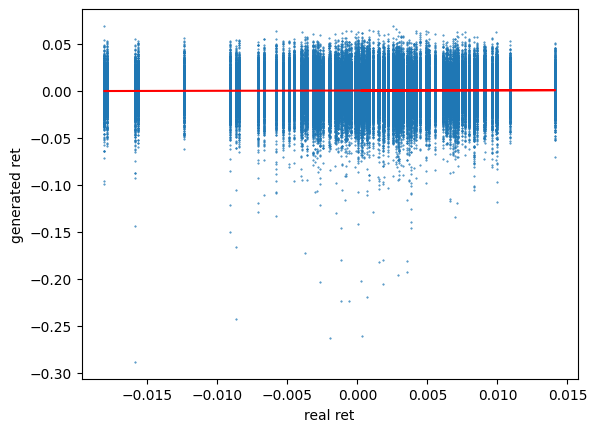

In [7]:
import matplotlib.pyplot as plt
generated = np.load(f"test_spx/simpath/conv_mem_spx_ex_rand_compress_context_1_gen3.npz")
surfaces = generated["surfaces"] #(num_day, num_sample, H, W)
ex_feats = generated["ex_feats"] #(num_day, num_sample, n_ex_feats)
generated_levels = surfaces[:, :, 3, 2]
generated_rets = ex_feats[:, :, 0]
X = []
y = []
for i in range(generated_rets.shape[0]):
    for j in range(generated_rets.shape[1]):
        X.append(real_ret[i])
        y.append(generated_rets[i, j])
model = smi.OLS(y, X).fit(cov_type="HC3")
y_pred = model.predict(X)
plt.plot(X, y_pred, color="red")
plt.scatter(X, y, s=0.2)
plt.xlabel("real ret")
plt.ylabel("generated ret")
plt.show()

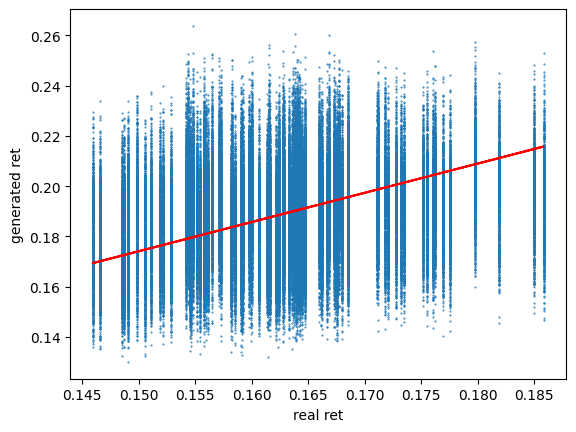

In [8]:
X = []
y = []
for i in range(generated_levels.shape[0]):
    for j in range(generated_levels.shape[1]):
        X.append(real_surface_levels[i])
        y.append(generated_levels[i, j])
model = smi.OLS(y, X).fit(cov_type="HC3")
y_pred = model.predict(X)
plt.plot(X, y_pred, color="red")
plt.scatter(X, y, s=0.2)
plt.xlabel("real ret")
plt.ylabel("generated ret")
plt.show()

# 5300 days

In [2]:
start_day = 3
days_to_generate = 5300
num_vaes = 1000

data = np.load("data/vol_surface_with_ret.npz")
vol_surf_data = data["surface"]
ret_data = data["ret"]
level_data = data["levels"]
skew_data = data["skews"]
slope_data = data["slopes"]

In [3]:
# we do a linear regression on 2 variables
# X = realized value on day t, Y = VAE values on day t
result_df = {
    "model_type": [],
    "level_coeff": [],
    "level_p_value": [],
    "level_r2": [],
    "ret_coeff": [],
    "ret_p_value": [],
    "ret_r2": [],
}
real_surface_levels = level_data[start_day:start_day+days_to_generate]
real_ret = ret_data[start_day:start_day+days_to_generate]
for f in ["gen_5300_1000_3",
          "gen_5300_1000_3_l2"]:
    result_df["model_type"].append(f)
    generated = np.load(f"test_spx/simpath/{f}.npz")
    surfaces = generated["surfaces"] #(num_day, num_sample, H, W)
    ex_feats = generated["ex_feats"] #(num_day, num_sample, n_ex_feats)
    generated_levels = surfaces[:, :, 3, 2]
    generated_rets = ex_feats[:, :, 0]
    X = []
    y = []
    for i in range(generated_levels.shape[0]):
        for j in range(generated_levels.shape[1]):
            X.append(real_surface_levels[i])
            y.append(generated_levels[i, j])
    model = smi.OLS(y, X).fit(cov_type="HC3")
    result_df["level_coeff"].append(model.params[0])
    result_df["level_p_value"].append(model.pvalues[0])
    result_df["level_r2"].append(model.rsquared_adj)
    X = []
    y = []
    for i in range(generated_rets.shape[0]):
        for j in range(generated_rets.shape[1]):
            X.append(real_ret[i])
            y.append(generated_rets[i, j])
    model = smi.OLS(y, X).fit(cov_type="HC3")
    result_df["ret_coeff"].append(model.params[0])
    result_df["ret_p_value"].append(model.pvalues[0])
    result_df["ret_r2"].append(model.rsquared_adj)
result_df = pd.DataFrame(result_df)
result_df.to_csv("test_spx/lin_reg_test3.csv", index=False)

In [4]:
# we do a linear regression on 2 variables
# X = realized value on day t, Y = VAE values on day t
result_df = {
    "model_type": [],
    "level_coeff": [],
    "level_p_value": [],
    "level_r2": [],
    "ret_coeff": [],
    "ret_p_value": [],
    "ret_r2": [],
}
real_surface_levels = level_data[start_day:start_day+days_to_generate]
real_ret = ret_data[start_day:start_day+days_to_generate]
for f in ["gen_5300_1000_3",
          "gen_5300_1000_3_l2"]:
    result_df["model_type"].append(f)
    generated = np.load(f"test_spx/simpath/{f}.npz")
    surfaces = generated["surfaces"] #(num_day, num_sample, H, W)
    ex_feats = generated["ex_feats"] #(num_day, num_sample, n_ex_feats)
    generated_levels = surfaces[:, :, 3, 2]
    generated_rets = ex_feats[:, :, 0]
    generated_levels_mean = np.mean(generated_levels, axis=1)
    model = smi.OLS(generated_levels_mean, real_surface_levels).fit(cov_type="HC3")
    result_df["level_coeff"].append(model.params[0])
    result_df["level_p_value"].append(model.pvalues[0])
    result_df["level_r2"].append(model.rsquared_adj)

    generated_rets_mean = np.mean(generated_rets, axis=1)
    model = smi.OLS(generated_rets_mean, real_ret).fit(cov_type="HC3")
    result_df["ret_coeff"].append(model.params[0])
    result_df["ret_p_value"].append(model.pvalues[0])
    result_df["ret_r2"].append(model.rsquared_adj)
result_df = pd.DataFrame(result_df)
result_df.to_csv("test_spx/lin_reg_test3-2.csv", index=False)